In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Admin\AppData\Local\Temp\ipykernel_10904\1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Pankaj-Str/codeswithpankaj.com-Machine-Learning/refs/heads/main/Exploratory%20Data%20Analysis%20(EDA)/students.csv")

print(data.head())

   gender race/ethnicity parental level of education         lunch  \
0    male        group A                 high school  free/reduced   
1  female        group A                 high school      standard   
2    male        group A                 high school      standard   
3    male        group E          associate's degree      standard   
4    male        group D            some high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0               completed          38             70             98  
1               completed          56             98             71  
2               completed          80             47             58  
3               completed          33             17             51  
4                    none          40             15             46  


In [3]:
print(data.shape) # find row and col numbers

(1000, 8)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# count null values 

print(data.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


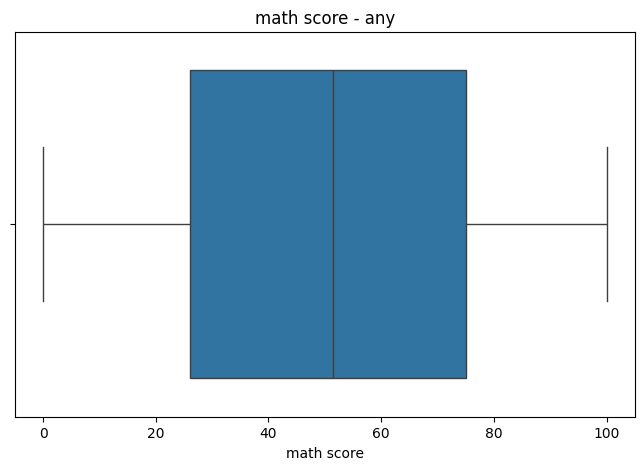

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['math score'])
plt.title("math score - any")
plt.show()

In [7]:
# find the normal range

q1 = data['math score'].quantile(0.25)
q2 = data['math score'].quantile(0.75)

IQR = q2-q1
data_clean = data[(data['math score'] >= q1 - 1.5 *IQR) & (data['math score'] <= q2 *IQR)]

SKEW Data  -0.033889641841880695


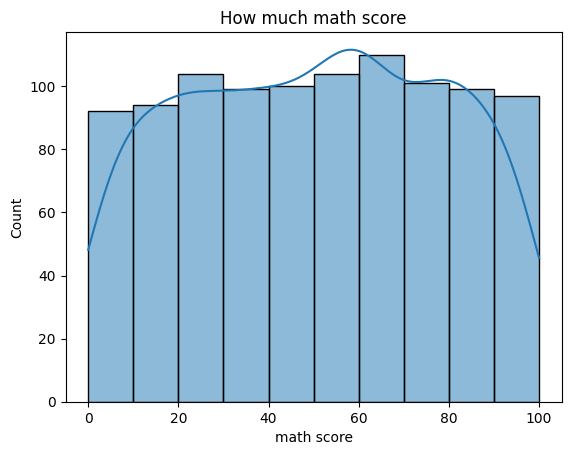

In [9]:
from scipy.stats import skew
print("SKEW Data ",skew(data['math score']))

sns.histplot(data['math score'],bins=10,kde=True)
plt.title("How much math score")
plt.show()


In [ ]:
# Date : 19 - March - 2025
# Numbers (Encoding) 

In [10]:
# install scikit-learn
%pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender_num'] = le.fit_transform(data['gender'])
print(" Gender Numbers ")
print(data[['gender','gender_num']].head())


 Gender Numbers 
   gender  gender_num
0    male           1
1  female           0
2    male           1
3    male           1
4    male           1


In [ ]:
data = pd.get_dummies(data,columns=['lunch'],prefix='lunch') # Iterable

In [14]:
# scale Numbers (Normalization) (0 and 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['math_score_norm'] = scaler.fit_transform(data[['math score']])
print(" math score (0 to 1)")
print(data['math_score_norm'].head())

 math score (0 to 1)
0    0.38
1    0.56
2    0.80
3    0.33
4    0.40
Name: math_score_norm, dtype: float64


In [17]:
# standardization (center at 0)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data['math_score_std'] = scaler.fit_transform(data[['math score']])
print(" math score standardization ")

print(data['math_score_std'].head())

 math score standardization 
0   -0.430777
1    0.205526
2    1.053930
3   -0.607528
4   -0.360077
Name: math_score_std, dtype: float64


In [24]:
# New features
data['average_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3
print(" avg score ")
print(data['average_score'].head())

 avg score 
0    68.666667
1    75.000000
2    61.666667
3    33.666667
4    33.666667
Name: average_score, dtype: float64


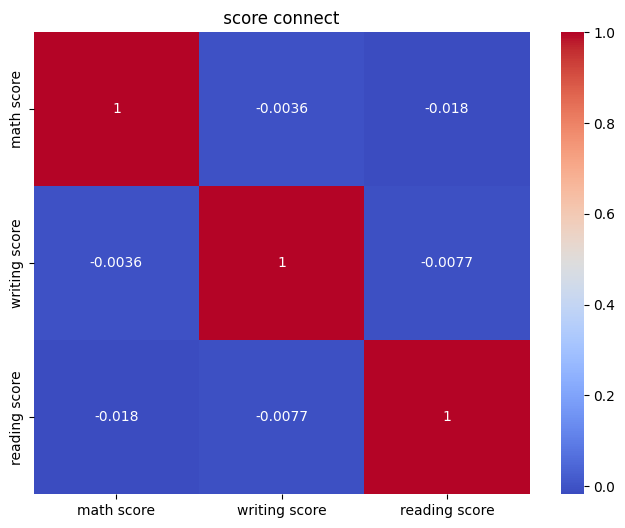

In [25]:
# find connections

corr1 = data[['math score','writing score','reading score']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr1,annot=True,cmap='coolwarm')
plt.title(" score connect ")
plt.show()

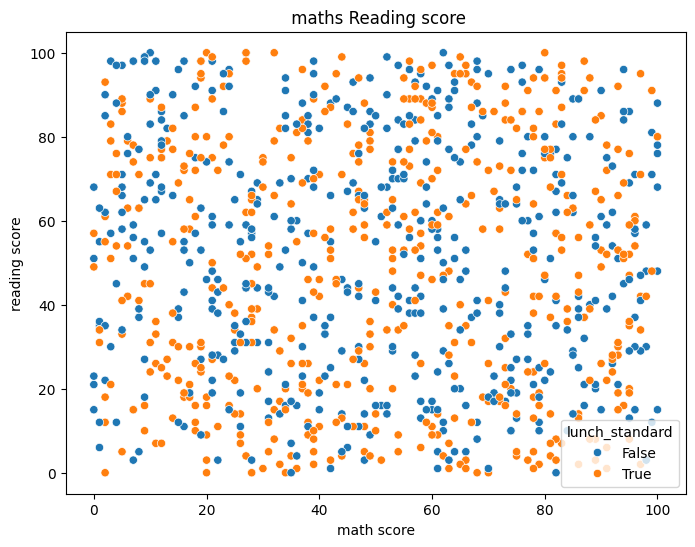

In [26]:
# scatter plot

plt.figure(figsize=(8,6))
sns.scatterplot(x='math score',y='reading score' , hue='lunch_standard',data=data)
plt.title(' maths Reading score')
plt.show()

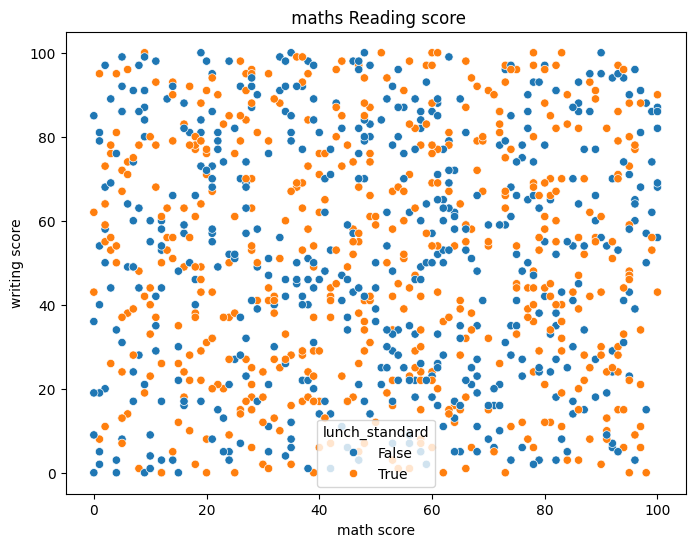

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='math score',y='writing score' , hue='lunch_standard',data=data)
plt.title(' maths Reading score')
plt.show()